#Approach

**1) About SciBert**

SCIBERT is  a pretrained language model based on BERT.

The BERT model architecture is based on a multilayer bidirectional Transformer. Instead of the traditional left-to-right language modeling
objective, BERT is trained on two tasks: predicting
randomly masked tokens and predicting whether
two sentences follow each other. SCIBERT follows the same architecture as BERT but is instead pretrained on scientific text.

SCIBERT was trained on a random sample
of 1.14M papers from Semantic Scholar. This corpus consists of 18% papers
from the computer science domain and 82% from the broad biomedical domain, that perfectly fits our task as far as our dataset was collected from Scemantic Scholar research corpus and consists of Chemical Data

**2) About task**

During the last ten years we can see a substantially growing interest in scientific publications in international jouranls of researcher from all over the world https://scival.com/landing

Eventhough, most of scientists are pursuing their goal with publishing researches in journals with the highest rank and achieving the best results in citations in order to increse one's h-index.  Nevertheless, individuals have limited time and do not want to waste time reading papers of no significance. Many would be more interested in reading papers that have a high impact in their fields so that they can get ahead of their peers in contributing to an emerging field. 

For papers that have already been published for more than five years, we can evaluate the itation impact of the paper using its citation count. However, for papers that have only been published recently, it is almost impossible to decide whether a paper would make a high citation mpact. 

**3) Solution**

In our project we are offering a quartil classification model based on SciBert, which can predict the quartil of a journal where the paper could be published with high probability taking onto account only information about title and abstract.

**4) Info**


*Dataset:* The data consists of scientific articles parsed from Semantic Scholar open research corpus that includes title and its abstract. The objective is to predict which quartil the article can achiev on these two unstructured texts. 

*Modeling:* We use SciBERT, a variant of BERT model, to obtain embedding for the title and abstract. We use huggingface library for the BERT model. We concateate the embedding and feed to MLP layer to predict 1/0 for each quartil independently

*Result:* Obtain substantial results on accuracy with more than 90% on test set and F1 score metrics

In [1]:
import pandas as pd
import requests
from tqdm import tqdm_notebook


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Loading and preprocessing dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/My Drive

/content/drive/My Drive


In [5]:
df = pd.read_csv('dois_parsed_super.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df

,Unnamed: 0,DOI,Title,Year,num_citiations,ISSN,Abstract
0,0,10.1016/j.jphotochemrev.2022.100534,Controlled optical manipulation and sorting of...,2022,0,13895567,NaN
1,1,10.1016/j.jphotochemrev.2022.100535,Laser-induced forward-transfer with light poss...,2022,0,13895567,NaN
2,2,10.1016/j.jphotochemrev.2022.100531,Optical manipulation with nanoscale chiral fie...,2022,0,13895567,NaN
3,3,10.1016/j.jphotochemrev.2022.100530,Manipulation of nucleation and polymorphism by...,2022,0,13895567,NaN
4,4,10.1016/j.jphotochemrev.2022.100532,Nanoscale optical imaging with photoinduced fo...,2022,0,13895567,NaN
...,...,...,...,...,...,...,...
1318847,1318847,10.3390/m278,"2-(1,3-Benzodioxol-5-yl)ethylene-1,1,2-tricarb...",2003,0,14228599,NaN
1318848,1318848,10.3390/m277,"Chiral Methyl 7,8,9-Trichloro-6,7,8,9-tetrahyd...",2003,0,14228599,NaN
1318849,1318849,10.3390/m280,5-[(2-Isopropyl-5-methylphenoxy)methyl]-4-phen...,2003,1,14228599,NaN
1318850,1318850,10.3390/m281,"(2Z)-3-(3,4-Dimethoxyphenyl)-2-(4-methylphenyl...",2003,0,14228599,NaN


In [7]:
df['Year'].value_counts()

2021    58701
2020    53974
2019    48606
2018    41794
2017    38616
        ...  
1903       83
1914       81
1915       72
1917       39
1916       18
Name: Year, Length: 191, dtype: int64

In [8]:
df2 = df.loc[(df['Year'] > 2010)] 
df2

,Unnamed: 0,DOI,Title,Year,num_citiations,ISSN,Abstract
0,0,10.1016/j.jphotochemrev.2022.100534,Controlled optical manipulation and sorting of...,2022,0,13895567,NaN
1,1,10.1016/j.jphotochemrev.2022.100535,Laser-induced forward-transfer with light poss...,2022,0,13895567,NaN
2,2,10.1016/j.jphotochemrev.2022.100531,Optical manipulation with nanoscale chiral fie...,2022,0,13895567,NaN
3,3,10.1016/j.jphotochemrev.2022.100530,Manipulation of nucleation and polymorphism by...,2022,0,13895567,NaN
4,4,10.1016/j.jphotochemrev.2022.100532,Nanoscale optical imaging with photoinduced fo...,2022,0,13895567,NaN
...,...,...,...,...,...,...,...
1318411,1318411,10.3390/m717,"7-Phenyl-3,4,8,9-tetrahydro-2H-pyridazino[1,6-...",2011,1,14228599,NaN
1318412,1318412,10.3390/m716,"Copper 5,10,15,20-Tetra(N-ethyl-3-carbazolyl) ...",2011,0,14228599,NaN
1318413,1318413,10.3390/m715,(Benzoylamino)methyl 4-Acetyloxybenzoate,2011,0,14228599,NaN
1318414,1318414,10.3390/m714,"[5-(1,3-Diphenyl-1H-pyrazol-4-yl)-3-phenyl-4,5...",2011,0,14228599,NaN


In [9]:
df3 = df2.loc[(df2['Year'] < 2021)] 
df3

,Unnamed: 0,DOI,Title,Year,num_citiations,ISSN,Abstract
57,57,10.1016/j.jphotochemrev.2020.100384,Curcumin as a photosensitizer: From molecular ...,2020,24,13895567,NaN
58,58,10.1016/j.jphotochemrev.2020.100385,Supramolecular chlorophyll aggregates inspired...,2020,15,13895567,NaN
59,59,10.1016/s1389-5567(20)30057-5,IFC(EDITORIAL BOARD),2020,0,13895567,NaN
60,60,10.1016/j.jphotochemrev.2020.100355,Photodynamical behaviour of MOFs and related c...,2020,17,13895567,NaN
61,61,10.1016/j.jphotochemrev.2020.100371,Through bond energy transfer (TBET)-based fluo...,2020,20,13895567,NaN
...,...,...,...,...,...,...,...
1318411,1318411,10.3390/m717,"7-Phenyl-3,4,8,9-tetrahydro-2H-pyridazino[1,6-...",2011,1,14228599,NaN
1318412,1318412,10.3390/m716,"Copper 5,10,15,20-Tetra(N-ethyl-3-carbazolyl) ...",2011,0,14228599,NaN
1318413,1318413,10.3390/m715,(Benzoylamino)methyl 4-Acetyloxybenzoate,2011,0,14228599,NaN
1318414,1318414,10.3390/m714,"[5-(1,3-Diphenyl-1H-pyrazol-4-yl)-3-phenyl-4,5...",2011,0,14228599,NaN


In [10]:
df3.sort_values(by=['Year'])

,Unnamed: 0,DOI,Title,Year,num_citiations,ISSN,Abstract
1318415,1318415,10.3390/m713,"(2E)-1-(2,5-Dimethyl-3-thienyl)-3-(4-nitrophen...",2011,0,14228599,NaN
807740,807740,10.1016/j.tetlet.2011.03.081,One-step biomimetic synthesis of (±)-linderasp...,2011,3,404039,NaN
807739,807739,10.1016/j.tetlet.2011.03.052,Synthesis of (2-chlorophenyl)(phenyl)methanone...,2011,4,404039,NaN
807738,807738,10.1016/j.tetlet.2011.03.008,Intramolecular Michael reactions of aliphatic ...,2011,15,404039,NaN
807737,807737,10.1016/j.tetlet.2011.03.034,"Solid-phase synthesis of N-substituted 3,4-dih...",2011,4,404039,NaN
...,...,...,...,...,...,...,...
1125513,1125513,10.2174/1385272823666191112102523,Functionalized Allenes: Generation by Sigmatro...,2020,3,13852728,<jats:sec><jats:title /><jats:p>The present re...
1125514,1125514,10.2174/1385272823666191121122011,"Synthesis of Allenes by 1,2-Elimination",2020,6,13852728,<jats:sec>\n<jats:title />\n<jats:p>Allenes re...
1125515,1125515,10.2174/1385272823666191202111723,The Chemical Methods of Disulfide Bond Formati...,2020,2,13852728,<jats:sec>\n<jats:title>:</jats:title>\n<jats:...
1125502,1125502,10.2174/1385272823666191209111934,Recent Advances on C-Se Bond-forming Reactions...,2020,16,13852728,<jats:sec><jats:title>:</jats:title><jats:p>Ov...


#Now we need to download all parced abstracts from semanticscholar

In [11]:
%cd /content/drive/My Drive/Abstracts

/content/drive/My Drive/Abstracts


In [12]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

gauth = GoogleAuth()

drive = GoogleDrive(gauth)

In [13]:
df_abs = pd.DataFrame()
for i in range(1,41):
    txt = pd.read_csv(f'abstracts_{i}.csv')
    df_abs=df_abs.append(txt,ignore_index=True)
txt

,Unnamed: 0,DOI,Abstract
0,0,10.6023/cjoc201611004,A new macrocyclic norbornene-based bis-triazol...
1,1,10.6023/cjoc201704030,Many organometallic reactions involve three el...
2,2,10.6023/cjoc201610046,研究了在温和的反应条件和FeCl 3 作用下，各种烯基醇与碘发生分子内碘代环化反应生成碘代环...
3,3,10.6023/cjoc201607010,An efficient methodology to access of quinazol...
4,4,10.6023/cjoc201704049,A simple and efficient nickel-catalyzed oxidat...
...,...,...,...
4701,4701,10.1080/00397910903576651,"A greener, economical, and efficient methodolo..."
4702,4702,10.1080/00397910903576594,Silica sulfuric acid has been utilized as an e...
4703,4703,10.1080/00397910903538644,"Benzo[b][1,5]thiazepines 1a or 1b were prepare..."
4704,4704,10.1080/00397911003587499,An efficient one-pot synthesis of tetrahydrobe...


In [14]:
df_abs

,Unnamed: 0,DOI,Abstract
0,0,10.1039/c3np70106a,Covering: up to 2014. Dithiolopyrrolone (DTP) ...
1,1,10.1039/c3np70087a,Bioactive natural products and derivatives rem...
2,2,10.1039/c3np70083f,"This review covers the isolation, chemical str..."
3,3,10.1039/c4np90008a,The ability to recreate Nature's molecules thr...
4,4,10.1039/c4np00021h,Covering: January 1990 to December 2012. Mycob...
...,...,...,...
131423,4701,10.1080/00397910903576651,"A greener, economical, and efficient methodolo..."
131424,4702,10.1080/00397910903576594,Silica sulfuric acid has been utilized as an e...
131425,4703,10.1080/00397910903538644,"Benzo[b][1,5]thiazepines 1a or 1b were prepare..."
131426,4704,10.1080/00397911003587499,An efficient one-pot synthesis of tetrahydrobe...


In [15]:
df_cd = pd.merge(df3, df_abs, how='inner', on = 'DOI')

In [16]:
df_cd

,Unnamed: 0_x,DOI,Title,Year,num_citiations,ISSN,Abstract_x,Unnamed: 0_y,Abstract_y
0,710,10.1039/d0np00072h,Employing chemical synthesis to study the stru...,2020,8,2650568,<p>This review recounts the chemical journey f...,0,Covering: 2015 to 2020The field of natural pro...
1,718,10.1039/d0np90029j,Hot off the Press,2020,0,2650568,<p>A personal selection of 32 recent papers is...,1,A personal selection of 32 recent papers is pr...
2,719,10.1039/c9np00028c,Phenolic cross-links: building and de-construc...,2020,58,2650568,<p>Phenolic cross-links and inter-unit linkage...,2,Covering: Up to 2019Phenolic cross-links and p...
3,722,10.1039/d0np00009d,Dehydration reactions in polyfunctional natura...,2020,10,2650568,"<p>Here, we review methods for chemical dehydr...",3,"Covering: up to 2020In this review, we present..."
4,723,10.1039/d0np00016g,"Diving into the world of marine 2,11-cyclized ...",2020,15,2650568,"<p>This review summarises new marine 2,11-cycl...",4,"Covering: 2010 to 2020The class of 2,11-cycliz..."
...,...,...,...,...,...,...,...,...,...
131423,1207229,10.1080/00397910903576651,Reaction on Water: A Greener Approach for the ...,2011,6,00397911,NaN,4701,"A greener, economical, and efficient methodolo..."
131424,1207230,10.1080/00397910903576594,Efficient Solvent-Free Knoevenagel Condensatio...,2011,13,00397911,NaN,4702,Silica sulfuric acid has been utilized as an e...
131425,1207231,10.1080/00397910903538644,Utility of α-Oxoketene and α-Cyanoketene Thioa...,2011,6,00397911,NaN,4703,"Benzo[b][1,5]thiazepines 1a or 1b were prepare..."
131426,1207232,10.1080/00397911003587499,Caro's Acid–Silica Gel: An Efficient and Versa...,2011,33,00397911,NaN,4704,An efficient one-pot synthesis of tetrahydrobe...


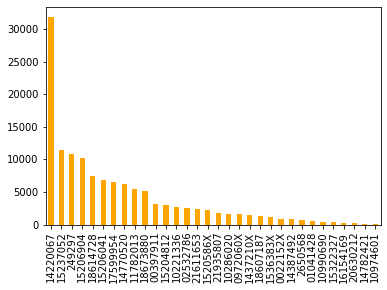

In [17]:
df_cd['ISSN'].value_counts().plot(kind='bar', color = 'orange');

As it can be seen from the barchart upper, the dataset is imbalanced in terms of issn quantity with the majority of articles from journal with issn = 14220067. It means that further our algorythm will mostly choose similar articles from this journal

In [18]:
df_drop = df_cd.drop(df_cd[df_cd['ISSN'] == 14220067].sample(n = 20000).index)

In [19]:
df_drop.reset_index(drop=True, inplace=True)

In [20]:
df_drop

,Unnamed: 0_x,DOI,Title,Year,num_citiations,ISSN,Abstract_x,Unnamed: 0_y,Abstract_y
0,710,10.1039/d0np00072h,Employing chemical synthesis to study the stru...,2020,8,2650568,<p>This review recounts the chemical journey f...,0,Covering: 2015 to 2020The field of natural pro...
1,718,10.1039/d0np90029j,Hot off the Press,2020,0,2650568,<p>A personal selection of 32 recent papers is...,1,A personal selection of 32 recent papers is pr...
2,719,10.1039/c9np00028c,Phenolic cross-links: building and de-construc...,2020,58,2650568,<p>Phenolic cross-links and inter-unit linkage...,2,Covering: Up to 2019Phenolic cross-links and p...
3,722,10.1039/d0np00009d,Dehydration reactions in polyfunctional natura...,2020,10,2650568,"<p>Here, we review methods for chemical dehydr...",3,"Covering: up to 2020In this review, we present..."
4,723,10.1039/d0np00016g,"Diving into the world of marine 2,11-cyclized ...",2020,15,2650568,"<p>This review summarises new marine 2,11-cycl...",4,"Covering: 2010 to 2020The class of 2,11-cycliz..."
...,...,...,...,...,...,...,...,...,...
111423,1207229,10.1080/00397910903576651,Reaction on Water: A Greener Approach for the ...,2011,6,00397911,NaN,4701,"A greener, economical, and efficient methodolo..."
111424,1207230,10.1080/00397910903576594,Efficient Solvent-Free Knoevenagel Condensatio...,2011,13,00397911,NaN,4702,Silica sulfuric acid has been utilized as an e...
111425,1207231,10.1080/00397910903538644,Utility of α-Oxoketene and α-Cyanoketene Thioa...,2011,6,00397911,NaN,4703,"Benzo[b][1,5]thiazepines 1a or 1b were prepare..."
111426,1207232,10.1080/00397911003587499,Caro's Acid–Silica Gel: An Efficient and Versa...,2011,33,00397911,NaN,4704,An efficient one-pot synthesis of tetrahydrobe...


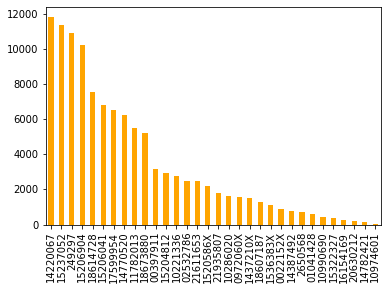

In [21]:
df_drop['ISSN'].value_counts().plot(kind='bar', color = 'orange');

In [22]:
df_cd = df_drop

In [23]:
df_cd = df_cd.drop_duplicates()
df_cd.reset_index(drop=True, inplace=True)
df_cd

,Unnamed: 0_x,DOI,Title,Year,num_citiations,ISSN,Abstract_x,Unnamed: 0_y,Abstract_y
0,710,10.1039/d0np00072h,Employing chemical synthesis to study the stru...,2020,8,2650568,<p>This review recounts the chemical journey f...,0,Covering: 2015 to 2020The field of natural pro...
1,718,10.1039/d0np90029j,Hot off the Press,2020,0,2650568,<p>A personal selection of 32 recent papers is...,1,A personal selection of 32 recent papers is pr...
2,719,10.1039/c9np00028c,Phenolic cross-links: building and de-construc...,2020,58,2650568,<p>Phenolic cross-links and inter-unit linkage...,2,Covering: Up to 2019Phenolic cross-links and p...
3,722,10.1039/d0np00009d,Dehydration reactions in polyfunctional natura...,2020,10,2650568,"<p>Here, we review methods for chemical dehydr...",3,"Covering: up to 2020In this review, we present..."
4,723,10.1039/d0np00016g,"Diving into the world of marine 2,11-cyclized ...",2020,15,2650568,"<p>This review summarises new marine 2,11-cycl...",4,"Covering: 2010 to 2020The class of 2,11-cycliz..."
...,...,...,...,...,...,...,...,...,...
110510,1207229,10.1080/00397910903576651,Reaction on Water: A Greener Approach for the ...,2011,6,00397911,NaN,4701,"A greener, economical, and efficient methodolo..."
110511,1207230,10.1080/00397910903576594,Efficient Solvent-Free Knoevenagel Condensatio...,2011,13,00397911,NaN,4702,Silica sulfuric acid has been utilized as an e...
110512,1207231,10.1080/00397910903538644,Utility of α-Oxoketene and α-Cyanoketene Thioa...,2011,6,00397911,NaN,4703,"Benzo[b][1,5]thiazepines 1a or 1b were prepare..."
110513,1207232,10.1080/00397911003587499,Caro's Acid–Silica Gel: An Efficient and Versa...,2011,33,00397911,NaN,4704,An efficient one-pot synthesis of tetrahydrobe...


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.metrics import accuracy_score, f1_score
from sklearn.utils import shuffle

In [25]:
df_cd['num_citiations'].mean()

22.736262045876124

#Let's load journals info

In [26]:
%cd /content/drive/My Drive

/content/drive/My Drive


In [27]:
jouranls_chemistry = pd.read_csv('scimagojr 2020 (1).csv', sep=';',header=0)
jouranls_chemistry['row_num'] = np.arange(len(jouranls_chemistry))
jouranls_chemistry

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2020),Total Docs. (3years),...,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher,Coverage,Categories,row_num
0,1,28773,Ca-A Cancer Journal for Clinicians,journal,"15424863, 00079235","62,937",Q1,168,47,119,...,15499,80,"126,34","73,45",United States,Northern America,Wiley-Blackwell,1950-2020,Hematology (Q1); Oncology (Q1),0
1,2,19434,MMWR Recommendations and Reports,journal,"10575987, 15458601","40,949",Q1,143,10,9,...,492,9,"50,00","129,20",United States,Northern America,Centers for Disease Control and Prevention (CDC),1990-2020,Epidemiology (Q1); Health Information Manageme...,1
2,3,20315,Nature Reviews Molecular Cell Biology,journal,"14710072, 14710080","37,461",Q1,431,115,338,...,10844,167,"32,83","73,38",United Kingdom,Western Europe,Nature Publishing Group,2000-2020,Cell Biology (Q1); Molecular Biology (Q1),2
3,4,29431,Quarterly Journal of Economics,journal,"00335533, 15314650","34,573",Q1,259,40,110,...,1945,109,"16,00","68,33",United Kingdom,Western Europe,Oxford University Press,1886-2020,Economics and Econometrics (Q1),3
4,5,21100812243,Nature Reviews Materials,journal,20588437,"32,011",Q1,108,92,264,...,11188,138,"32,15","115,57",United Kingdom,Western Europe,Nature Publishing Group,2016-2020,"Biomaterials (Q1); Electronic, Optical and Mag...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32947,32948,25412,Zhonghua kou qiang yi xue za zhi = Zhonghua ko...,journal,10020098,NaN,-,14,150,0,...,0,0,"0,00","0,00",China,Asiatic Region,Zhonghua Yixuehui Zazhishe,"1987-2016, 2020",Medicine (miscellaneous),32947
32948,32949,21485,Zhonghua liu xing bing xue za zhi = Zhonghua l...,journal,02546450,NaN,-,31,292,0,...,0,0,"0,00","0,00",China,Asiatic Region,Zhonghua Yixuehui Zazhishe,"1982-2016, 2020",Medicine (miscellaneous),32948
32949,32950,26726,Zhonghua nei ke za zhi [Chinese journal of int...,journal,05781426,NaN,-,18,5,0,...,0,0,"0,00","0,00",China,Asiatic Region,Zhonghua Yixuehui Zazhishe,"1957-1959, 1979-1997, 1999-2016, 2020",Medicine (miscellaneous),32949
32950,32951,19324,Zhonghua wai ke za zhi [Chinese journal of sur...,journal,05295815,NaN,-,16,5,0,...,0,0,"0,00","0,00",China,Asiatic Region,Zhonghua Yixuehui Zazhishe,"1957, 1959-1964, 1979-2016, 2020",Medicine (miscellaneous),32950


In [28]:
journ_chem_org = jouranls_chemistry[jouranls_chemistry['Categories'].str.contains("Organic Chemistry")]
journ_chem_org = journ_chem_org[journ_chem_org['Issn'] != '-']

In [29]:
comma = ","
for i in journ_chem_org['row_num']:
  for comma in  journ_chem_org['Issn'][i]:
     journ_chem_org['Issn'][i] = journ_chem_org['Issn'][i].split(',')[0]
     
journ_chem_org['Issn'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


array(['00796700', '13895567', '02650568', '22132317', '00249297',
       '21611653', '15237052', '15213765', '18791344', '13504177',
       '00162361', '16154169', '00025100', '18673880', '14220067',
       '17599954', '20524110', '10221336', '15204812', '11782013',
       '15206041', '15206904', '18614728', '02235234', '23670932',
       '19485875', '14394227', '00219673', '01633864', '11100621',
       '09298673', '14770520', '00330655', '20630212', '14387492',
       '00323861', '1520586X', '09394451', '00143057', '00652725',
       '1437210X', '20901283', '15653633', '19763786', '21935807',
       '10990690', '18607187', '07248741', '01429418', '00452068',
       '00786179', '14203049', '10990518', '18605397', '26328682',
       '0018019X', '25901478', '14643391', '15723887', '22126198',
       '09365214', '1788618X', '02567679', '00653195', '18732941',
       '02682575', '21922209', '03639045', '00389056', '14643405',
       '15589307', '09253467', '10970126', '17470277', '030100

In [30]:
journ_chem_org.reset_index(drop=True, inplace=True)
journ_chem_org

,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2020),Total Docs. (3years),...,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher,Coverage,Categories,row_num
0,212,26465,Progress in Polymer Science,journal,00796700,"5,952",Q1,279,55,169,...,4645,169,"27,57","217,56",United Kingdom,Western Europe,Elsevier Ltd.,"1967, 1970-1971, 1975, 1977-1978, 1980-1986, 1...",Ceramics and Composites (Q1); Materials Chemis...,211
1,649,26968,Journal of Photochemistry and Photobiology C: ...,journal,13895567,"2,987",Q1,92,12,68,...,848,67,"11,72","223,50",Netherlands,Western Europe,Elsevier,2000-2020,Catalysis (Q1); Organic Chemistry (Q1); Physic...,648
2,773,26371,Natural Product Reports,journal,02650568,"2,703",Q1,177,92,246,...,2233,239,"8,45","138,00",United Kingdom,Western Europe,Royal Society of Chemistry,1984-2020,Biochemistry (Q1); Drug Discovery (Q1); Organi...,772
3,1247,21100242403,Redox Biology,journal,22132317,"2,059",Q1,88,434,783,...,8400,770,"10,47","78,28",Netherlands,Western Europe,Elsevier BV,2013-2020,Biochemistry (Q1); Clinical Biochemistry (Q1);...,1246
4,1317,21100779404,Macromolecules,journal,00249297,"1,994",Q1,313,1070,2971,...,17662,2956,"5,48","57,47",United States,Northern America,American Chemical Society,1968-2020,Inorganic Chemistry (Q1); Materials Chemistry ...,1316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,24267,21100202726,Trends in Carbohydrate Research,journal,09750304,"0,140",Q4,7,24,70,...,22,70,"0,28","41,71",India,Asiatic Region,Association of Carbohydrate Chemists and Techn...,2009-2020,Organic Chemistry (Q4),24266
171,24805,21100201730,Organophosphorus Chemistry,book series,14651904,"0,135",Q4,7,9,19,...,11,17,"0,56","165,56",United Kingdom,Western Europe,Chemical Society,"2008, 2012, 2014-2018, 2020",Biochemistry (Q4); Organic Chemistry (Q4),24804
172,25664,19800188074,Medicinal Plants - International Journal of Ph...,journal,09754261,"0,128",Q4,10,74,163,...,37,162,"0,27","36,09",Netherlands,Western Europe,IOS Press,2010-2020,Drug Discovery (Q4); Organic Chemistry (Q4); P...,25663
173,26756,24112,Indian Journal of Heterocyclic Chemistry,journal,09711627,"0,122",Q4,30,81,90,...,23,90,"0,32","28,20",India,Asiatic Region,Connect Journals,1996-2020,Biochemistry (Q4); Organic Chemistry (Q4),26755


In [31]:
journ_chem_org['ISSN'] = journ_chem_org['Issn']

In [32]:
df_cd['ISSN'].unique()

array([2650568, 249297, 21611653, 15237052, 16154169, 18673880, 14220067,
       17599954, 10221336, 15204812, 11782013, 15206041, 15206904,
       18614728, '14770520', '20630212', '14387492', '1520586X',
       '1437210X', '21935807', '10990690', '18607187', '0972060X',
       '10286020', '14782421', '1536383X', '15322327', '10974601',
       '0022152X', '01041428', '02532786', '00397911'], dtype=object)

We have 2 datasets:

1) Articles info

2) Journals info

Each of them contains same column with ISSN number by which they can be merged together for linking articles and quartiles

However, as some of issn from the data dataset were converted to integers, we need to bring them back into initial form

In [33]:
stroke = 3*'0'
stroke

'000'

In [34]:
k = 1
zero = '0'
ISSN_str = []
for i in range(len(df_cd['ISSN'])):
    if len(str(df_cd['ISSN'][i])) < 8:
      
        k = 8 - len(str(df_cd['ISSN'][i]))
        zero = k*'0'
        
        ISSN_str.append(zero + str(df_cd['ISSN'][i]))
    else: 
        ISSN_str.append(str(df_cd['ISSN'][i]))

df_cd['ISSN_str'] = ISSN_str
        
df_cd['ISSN_str']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0         02650568
1         02650568
2         02650568
3         02650568
4         02650568
            ...   
110510    00397911
110511    00397911
110512    00397911
110513    00397911
110514    00397911
Name: ISSN_str, Length: 110515, dtype: object

In [35]:
df_cd['Issn'] = df_cd['ISSN_str']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df_cd

,Unnamed: 0_x,DOI,Title,Year,num_citiations,ISSN,Abstract_x,Unnamed: 0_y,Abstract_y,ISSN_str,Issn
0,710,10.1039/d0np00072h,Employing chemical synthesis to study the stru...,2020,8,2650568,<p>This review recounts the chemical journey f...,0,Covering: 2015 to 2020The field of natural pro...,02650568,02650568
1,718,10.1039/d0np90029j,Hot off the Press,2020,0,2650568,<p>A personal selection of 32 recent papers is...,1,A personal selection of 32 recent papers is pr...,02650568,02650568
2,719,10.1039/c9np00028c,Phenolic cross-links: building and de-construc...,2020,58,2650568,<p>Phenolic cross-links and inter-unit linkage...,2,Covering: Up to 2019Phenolic cross-links and p...,02650568,02650568
3,722,10.1039/d0np00009d,Dehydration reactions in polyfunctional natura...,2020,10,2650568,"<p>Here, we review methods for chemical dehydr...",3,"Covering: up to 2020In this review, we present...",02650568,02650568
4,723,10.1039/d0np00016g,"Diving into the world of marine 2,11-cyclized ...",2020,15,2650568,"<p>This review summarises new marine 2,11-cycl...",4,"Covering: 2010 to 2020The class of 2,11-cycliz...",02650568,02650568
...,...,...,...,...,...,...,...,...,...,...,...
110510,1207229,10.1080/00397910903576651,Reaction on Water: A Greener Approach for the ...,2011,6,00397911,NaN,4701,"A greener, economical, and efficient methodolo...",00397911,00397911
110511,1207230,10.1080/00397910903576594,Efficient Solvent-Free Knoevenagel Condensatio...,2011,13,00397911,NaN,4702,Silica sulfuric acid has been utilized as an e...,00397911,00397911
110512,1207231,10.1080/00397910903538644,Utility of α-Oxoketene and α-Cyanoketene Thioa...,2011,6,00397911,NaN,4703,"Benzo[b][1,5]thiazepines 1a or 1b were prepare...",00397911,00397911
110513,1207232,10.1080/00397911003587499,Caro's Acid–Silica Gel: An Efficient and Versa...,2011,33,00397911,NaN,4704,An efficient one-pot synthesis of tetrahydrobe...,00397911,00397911


In [37]:
journ_chem_org

,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2020),Total Docs. (3years),...,Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher,Coverage,Categories,row_num,ISSN
0,212,26465,Progress in Polymer Science,journal,00796700,"5,952",Q1,279,55,169,...,169,"27,57","217,56",United Kingdom,Western Europe,Elsevier Ltd.,"1967, 1970-1971, 1975, 1977-1978, 1980-1986, 1...",Ceramics and Composites (Q1); Materials Chemis...,211,00796700
1,649,26968,Journal of Photochemistry and Photobiology C: ...,journal,13895567,"2,987",Q1,92,12,68,...,67,"11,72","223,50",Netherlands,Western Europe,Elsevier,2000-2020,Catalysis (Q1); Organic Chemistry (Q1); Physic...,648,13895567
2,773,26371,Natural Product Reports,journal,02650568,"2,703",Q1,177,92,246,...,239,"8,45","138,00",United Kingdom,Western Europe,Royal Society of Chemistry,1984-2020,Biochemistry (Q1); Drug Discovery (Q1); Organi...,772,02650568
3,1247,21100242403,Redox Biology,journal,22132317,"2,059",Q1,88,434,783,...,770,"10,47","78,28",Netherlands,Western Europe,Elsevier BV,2013-2020,Biochemistry (Q1); Clinical Biochemistry (Q1);...,1246,22132317
4,1317,21100779404,Macromolecules,journal,00249297,"1,994",Q1,313,1070,2971,...,2956,"5,48","57,47",United States,Northern America,American Chemical Society,1968-2020,Inorganic Chemistry (Q1); Materials Chemistry ...,1316,00249297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,24267,21100202726,Trends in Carbohydrate Research,journal,09750304,"0,140",Q4,7,24,70,...,70,"0,28","41,71",India,Asiatic Region,Association of Carbohydrate Chemists and Techn...,2009-2020,Organic Chemistry (Q4),24266,09750304
171,24805,21100201730,Organophosphorus Chemistry,book series,14651904,"0,135",Q4,7,9,19,...,17,"0,56","165,56",United Kingdom,Western Europe,Chemical Society,"2008, 2012, 2014-2018, 2020",Biochemistry (Q4); Organic Chemistry (Q4),24804,14651904
172,25664,19800188074,Medicinal Plants - International Journal of Ph...,journal,09754261,"0,128",Q4,10,74,163,...,162,"0,27","36,09",Netherlands,Western Europe,IOS Press,2010-2020,Drug Discovery (Q4); Organic Chemistry (Q4); P...,25663,09754261
173,26756,24112,Indian Journal of Heterocyclic Chemistry,journal,09711627,"0,122",Q4,30,81,90,...,90,"0,32","28,20",India,Asiatic Region,Connect Journals,1996-2020,Biochemistry (Q4); Organic Chemistry (Q4),26755,09711627


In [38]:
df_quartile = pd.merge(df_cd, journ_chem_org, how='inner', on = 'Issn')
df_quartile 

,Unnamed: 0_x,DOI,Title_x,Year,num_citiations,ISSN_x,Abstract_x,Unnamed: 0_y,Abstract_y,ISSN_str,...,Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher,Coverage,Categories,row_num,ISSN_y
0,710,10.1039/d0np00072h,Employing chemical synthesis to study the stru...,2020,8,2650568,<p>This review recounts the chemical journey f...,0,Covering: 2015 to 2020The field of natural pro...,02650568,...,239,"8,45","138,00",United Kingdom,Western Europe,Royal Society of Chemistry,1984-2020,Biochemistry (Q1); Drug Discovery (Q1); Organi...,772,02650568
1,718,10.1039/d0np90029j,Hot off the Press,2020,0,2650568,<p>A personal selection of 32 recent papers is...,1,A personal selection of 32 recent papers is pr...,02650568,...,239,"8,45","138,00",United Kingdom,Western Europe,Royal Society of Chemistry,1984-2020,Biochemistry (Q1); Drug Discovery (Q1); Organi...,772,02650568
2,719,10.1039/c9np00028c,Phenolic cross-links: building and de-construc...,2020,58,2650568,<p>Phenolic cross-links and inter-unit linkage...,2,Covering: Up to 2019Phenolic cross-links and p...,02650568,...,239,"8,45","138,00",United Kingdom,Western Europe,Royal Society of Chemistry,1984-2020,Biochemistry (Q1); Drug Discovery (Q1); Organi...,772,02650568
3,722,10.1039/d0np00009d,Dehydration reactions in polyfunctional natura...,2020,10,2650568,"<p>Here, we review methods for chemical dehydr...",3,"Covering: up to 2020In this review, we present...",02650568,...,239,"8,45","138,00",United Kingdom,Western Europe,Royal Society of Chemistry,1984-2020,Biochemistry (Q1); Drug Discovery (Q1); Organi...,772,02650568
4,723,10.1039/d0np00016g,"Diving into the world of marine 2,11-cyclized ...",2020,15,2650568,"<p>This review summarises new marine 2,11-cycl...",4,"Covering: 2010 to 2020The class of 2,11-cycliz...",02650568,...,239,"8,45","138,00",United Kingdom,Western Europe,Royal Society of Chemistry,1984-2020,Biochemistry (Q1); Drug Discovery (Q1); Organi...,772,02650568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110510,1207229,10.1080/00397910903576651,Reaction on Water: A Greener Approach for the ...,2011,6,00397911,NaN,4701,"A greener, economical, and efficient methodolo...",00397911,...,828,"1,89","50,08",United States,Northern America,Taylor and Francis Ltd.,1971-2020,Organic Chemistry (Q4),14476,00397911
110511,1207230,10.1080/00397910903576594,Efficient Solvent-Free Knoevenagel Condensatio...,2011,13,00397911,NaN,4702,Silica sulfuric acid has been utilized as an e...,00397911,...,828,"1,89","50,08",United States,Northern America,Taylor and Francis Ltd.,1971-2020,Organic Chemistry (Q4),14476,00397911
110512,1207231,10.1080/00397910903538644,Utility of α-Oxoketene and α-Cyanoketene Thioa...,2011,6,00397911,NaN,4703,"Benzo[b][1,5]thiazepines 1a or 1b were prepare...",00397911,...,828,"1,89","50,08",United States,Northern America,Taylor and Francis Ltd.,1971-2020,Organic Chemistry (Q4),14476,00397911
110513,1207232,10.1080/00397911003587499,Caro's Acid–Silica Gel: An Efficient and Versa...,2011,33,00397911,NaN,4704,An efficient one-pot synthesis of tetrahydrobe...,00397911,...,828,"1,89","50,08",United States,Northern America,Taylor and Francis Ltd.,1971-2020,Organic Chemistry (Q4),14476,00397911


#Let's drop useless columns from the resulted dataset

In [39]:
df_quartile = df_quartile.drop(columns = ['Unnamed: 0_x', 'Unnamed: 0_y', 'Country',	'Region', 	'Publisher', 	'Coverage', 	'Categories', 	'row_num'  ])

In [40]:
df_quartile = df_quartile.drop(columns = ['Abstract_x',	'ISSN_str',	'ISSN_x'])

In [41]:
df_quartile_drop = df_quartile.drop(columns = ['H index',	'Total Docs. (2020)',	'Total Docs. (3years)',	'Total Refs.', 'Total Cites (3years)', 'Citable Docs. (3years)', 'Cites / Doc. (2years)', 'Ref. / Doc.', 'ISSN_y', 'Title_y',	'Type',	'SJR' ])

In [42]:
df_quartile_drop

,DOI,Title_x,Year,num_citiations,Abstract_y,Issn,Rank,Sourceid,SJR Best Quartile
0,10.1039/d0np00072h,Employing chemical synthesis to study the stru...,2020,8,Covering: 2015 to 2020The field of natural pro...,02650568,773,26371,Q1
1,10.1039/d0np90029j,Hot off the Press,2020,0,A personal selection of 32 recent papers is pr...,02650568,773,26371,Q1
2,10.1039/c9np00028c,Phenolic cross-links: building and de-construc...,2020,58,Covering: Up to 2019Phenolic cross-links and p...,02650568,773,26371,Q1
3,10.1039/d0np00009d,Dehydration reactions in polyfunctional natura...,2020,10,"Covering: up to 2020In this review, we present...",02650568,773,26371,Q1
4,10.1039/d0np00016g,"Diving into the world of marine 2,11-cyclized ...",2020,15,"Covering: 2010 to 2020The class of 2,11-cycliz...",02650568,773,26371,Q1
...,...,...,...,...,...,...,...,...,...
110510,10.1080/00397910903576651,Reaction on Water: A Greener Approach for the ...,2011,6,"A greener, economical, and efficient methodolo...",00397911,14477,26509,Q4
110511,10.1080/00397910903576594,Efficient Solvent-Free Knoevenagel Condensatio...,2011,13,Silica sulfuric acid has been utilized as an e...,00397911,14477,26509,Q4
110512,10.1080/00397910903538644,Utility of α-Oxoketene and α-Cyanoketene Thioa...,2011,6,"Benzo[b][1,5]thiazepines 1a or 1b were prepare...",00397911,14477,26509,Q4
110513,10.1080/00397911003587499,Caro's Acid–Silica Gel: An Efficient and Versa...,2011,33,An efficient one-pot synthesis of tetrahydrobe...,00397911,14477,26509,Q4


In [43]:
df_quartile_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110515 entries, 0 to 110514
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DOI                110515 non-null  object
 1   Title_x            110514 non-null  object
 2   Year               110515 non-null  int64 
 3   num_citiations     110515 non-null  int64 
 4   Abstract_y         110515 non-null  object
 5   Issn               110515 non-null  object
 6   Rank               110515 non-null  int64 
 7   Sourceid           110515 non-null  int64 
 8   SJR Best Quartile  110515 non-null  object
dtypes: int64(4), object(5)
memory usage: 8.4+ MB


**As we can see below the qualtile data is imbalanced with the majority of papers published in Q1 journals**

In [44]:
df_quartile_drop['SJR Best Quartile'].value_counts()

Q1    96686
Q4     5661
Q3     4724
Q2     3444
Name: SJR Best Quartile, dtype: int64

##Dataset balancing by quartile

In [45]:
df_quartile_drop = df_quartile_drop.drop(df_quartile_drop[df_quartile_drop['SJR Best Quartile'] == 'Q1'].sample(n = 91025).index)

In [46]:
df_quartile_drop.reset_index(drop=True, inplace=True)

In [47]:
df_quartile_drop['SJR Best Quartile'].value_counts()

Q1    5661
Q4    5661
Q3    4724
Q2    3444
Name: SJR Best Quartile, dtype: int64

In [48]:
df_quartile_drop['Issn'].value_counts()

00397911    3158
02532786    2503
21935807    1796
10286020    1648
0972060X    1589
1536383X    1136
0022152X     889
14220067     684
15237052     658
15206904     590
01041428     586
00249297     585
18614728     425
15206041     385
14770520     373
17599954     373
15322327     356
11782013     345
18673880     302
15204812     182
10221336     175
21611653     167
14782421     137
1520586X     133
1437210X      83
18607187      58
14387492      54
02650568      40
10974601      31
10990690      24
16154169      15
20630212      10
Name: Issn, dtype: int64

#**SciBert training**

# Training dataset preparation

In [49]:
cellsFrameBERT = pd.get_dummies(df_quartile_drop['SJR Best Quartile'])

In [50]:
cellsFrameBERT

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
19485,0,0,0,1
19486,0,0,0,1
19487,0,0,0,1
19488,0,0,0,1


In [51]:
df_quartile_drop

,DOI,Title_x,Year,num_citiations,Abstract_y,Issn,Rank,Sourceid,SJR Best Quartile
0,10.1039/c9np00045c,Biosynthetic gene clusters and the evolution o...,2020,40,Covering: up to 2019Fungi produce a remarkable...,02650568,773,26371,Q1
1,10.1039/d0np00004c,"Round, round we go – strategies for enzymatic ...",2020,41,Covering: up to the beginning of 2020Enzymes d...,02650568,773,26371,Q1
2,10.1039/c9np00066f,Natural products as modulators of eukaryotic p...,2020,18,Covering: up to the end of 2019Diverse natural...,02650568,773,26371,Q1
3,10.1039/c8np00027a,Harnessing diverse transcriptional regulators ...,2020,42,Covering: Up to March 2019Secondary metabolite...,02650568,773,26371,Q1
4,10.1039/d0np00015a,Guided by evolution: from biology oriented syn...,2020,18,Covering: up to 2020Natural products (NPs) pro...,02650568,773,26371,Q1
...,...,...,...,...,...,...,...,...,...
19485,10.1080/00397910903576651,Reaction on Water: A Greener Approach for the ...,2011,6,"A greener, economical, and efficient methodolo...",00397911,14477,26509,Q4
19486,10.1080/00397910903576594,Efficient Solvent-Free Knoevenagel Condensatio...,2011,13,Silica sulfuric acid has been utilized as an e...,00397911,14477,26509,Q4
19487,10.1080/00397910903538644,Utility of α-Oxoketene and α-Cyanoketene Thioa...,2011,6,"Benzo[b][1,5]thiazepines 1a or 1b were prepare...",00397911,14477,26509,Q4
19488,10.1080/00397911003587499,Caro's Acid–Silica Gel: An Efficient and Versa...,2011,33,An efficient one-pot synthesis of tetrahydrobe...,00397911,14477,26509,Q4


In [52]:
train_data_BERT = df_quartile_drop
train_data_BERT = train_data_BERT.join(cellsFrameBERT)
train_data_BERT = train_data_BERT.drop(columns=['Issn'])
train_data_BERT = train_data_BERT.drop(columns=['Rank'])
train_data_BERT = train_data_BERT.drop(columns=['Sourceid'])
train_data_BERT = train_data_BERT.drop(columns=['Year'])
train_data_BERT

,DOI,Title_x,num_citiations,Abstract_y,SJR Best Quartile,Q1,Q2,Q3,Q4
0,10.1039/c9np00045c,Biosynthetic gene clusters and the evolution o...,40,Covering: up to 2019Fungi produce a remarkable...,Q1,1,0,0,0
1,10.1039/d0np00004c,"Round, round we go – strategies for enzymatic ...",41,Covering: up to the beginning of 2020Enzymes d...,Q1,1,0,0,0
2,10.1039/c9np00066f,Natural products as modulators of eukaryotic p...,18,Covering: up to the end of 2019Diverse natural...,Q1,1,0,0,0
3,10.1039/c8np00027a,Harnessing diverse transcriptional regulators ...,42,Covering: Up to March 2019Secondary metabolite...,Q1,1,0,0,0
4,10.1039/d0np00015a,Guided by evolution: from biology oriented syn...,18,Covering: up to 2020Natural products (NPs) pro...,Q1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
19485,10.1080/00397910903576651,Reaction on Water: A Greener Approach for the ...,6,"A greener, economical, and efficient methodolo...",Q4,0,0,0,1
19486,10.1080/00397910903576594,Efficient Solvent-Free Knoevenagel Condensatio...,13,Silica sulfuric acid has been utilized as an e...,Q4,0,0,0,1
19487,10.1080/00397910903538644,Utility of α-Oxoketene and α-Cyanoketene Thioa...,6,"Benzo[b][1,5]thiazepines 1a or 1b were prepare...",Q4,0,0,0,1
19488,10.1080/00397911003587499,Caro's Acid–Silica Gel: An Efficient and Versa...,33,An efficient one-pot synthesis of tetrahydrobe...,Q4,0,0,0,1


In [53]:
train_data_BERT = train_data_BERT.drop(columns=['SJR Best Quartile'])

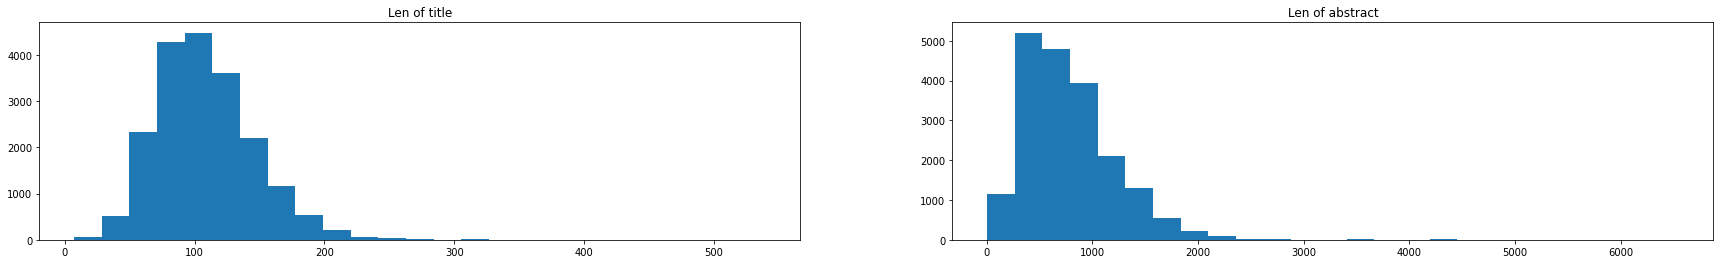

In [54]:
plt.figure(figsize=(30, 4))

plt.subplot(1, 2, 1)
plt.hist(train_data_BERT['Title_x'].str.len(), bins=25)
plt.title('Len of title')

plt.subplot(1, 2, 2)
plt.hist(train_data_BERT['Abstract_y'].str.len(), bins=25)
plt.title('Len of abstract')

plt.show()

**Token Lengths:**

In average, the title has length around 100 tokens.

The abstract, on the other hand, has on average less than 2500 tokens

In [55]:
def tokenize(x: tf.Tensor, max_length=250):#250 - the length of tokens for title
    x = x.numpy().decode('utf-8')
    tokens = tokenizer.encode_plus(x, 
                                   padding='max_length', 
                                   return_tensors="tf", 
                                   max_length=max_length, 
                                   truncation=True,  
                                   pad_to_max_length=True, 
                                   return_token_type_ids=False)
    return tokens['input_ids'], tokens['attention_mask']

In [56]:
def convert_to_tf_tensor(title, abstract, label):
    title = tf.squeeze(tf.py_function(tokenize, [title], Tout=[tf.int32, tf.int32]))
    abstract = tf.squeeze(tf.py_function(tokenize, [abstract, 500], Tout=[tf.int32, tf.int32]))
    
    return title[0], title[1], abstract[0], abstract[1], tf.expand_dims(label, axis=-1)

In [57]:
def map_to_dict(title_inputs_ids, title_attention_mask, abstract_input_ids, abstract_attention_mask, labels):
    inputs = {
        'title_input_ids': title_inputs_ids,
        'title_attention_mask': title_attention_mask,
        'abstract_input_ids': abstract_input_ids, 
        'abstract_attention_mask': abstract_attention_mask
    }
    return inputs, labels

In [58]:
total_rows = len(train_data_BERT)

train_data_BERT = shuffle(train_data_BERT) #data shuffling
train_size = int(total_rows * 0.8)
valid_size = int(total_rows * 0.1)

df_train = train_data_BERT[:train_size]
df_valid = train_data_BERT[train_size : train_size+valid_size]
df_test = train_data_BERT[train_size+valid_size:]

In [59]:
train_data_BERT

,DOI,Title_x,num_citiations,Abstract_y,Q1,Q2,Q3,Q4
18495,10.1080/00397911.2012.698355,Synthesis and Characterization of Novel Acycli...,2,Abstract A novel group of symmetrical and asym...,0,0,0,1
1074,10.1021/acs.orglett.8b02325,Nickel-Catalyzed Asymmetric Propargylic Aminat...,22,We have achieved the nickel-catalyzed asymmetr...,1,0,0,0
15145,10.6023/cjoc201605007,Recent Advances in Hypervalent Iodine Chemistry,25,"In recent years, an explosive growth of reacti...",0,0,0,1
8707,10.1080/0972060x.2013.813266,Headspace Analysis of Floral Scent from Two Di...,12,Abstract The chemical compositions of floral s...,0,0,1,0
17602,10.1080/00397911.2016.1196293,Superacid-catalyzed tandem Meyer–Schuster rear...,9,"ABSTRACT A TfOH-catalyzed synthesis of 2,3-dih...",0,0,0,1
...,...,...,...,...,...,...,...,...
1895,10.3390/ijms21093264,Cholinergic Markers and Cytokines in OSA Patients,3,The role of inflammation and dysfunction of th...,1,0,0,0
1985,10.3390/ijms20215399,Immunotherapies and Future Combination Strateg...,18,Head and neck squamous cell carcinoma (HNSCC) ...,1,0,0,0
9849,10.1080/10286020.2015.1057577,Three new compounds from <i>Cinnamomum cassia</i>,20,"Three new compounds, including two new diterpe...",0,1,0,0
9515,10.1080/10286020.2017.1373101,Antioxidant phenolic acids from the leaves of ...,3,Abstract Phytochemical investigation of the le...,0,1,0,0


In [60]:
train_label = df_train.drop(['DOI', 'Title_x',  'num_citiations',  'Abstract_y'], axis=1)
train_data = tf.data.Dataset.from_tensor_slices((df_train['Title_x'], df_train['Abstract_y'], train_label))

valid_label = df_valid.drop(['DOI', 'Title_x',  'num_citiations', 'Abstract_y'], axis=1)
valid_data = tf.data.Dataset.from_tensor_slices((df_valid['Title_x'], df_valid['Abstract_y'], valid_label))

test_label = df_test.drop(['DOI', 'Title_x',  'num_citiations', 'Abstract_y'], axis=1)
test_data = tf.data.Dataset.from_tensor_slices((df_test['Title_x'], df_test['Abstract_y'], test_label))

In [61]:
test_label

,Q1,Q2,Q3,Q4
17504,0,0,0,1
570,1,0,0,0
11188,0,0,1,0
18866,0,0,0,1
15427,0,0,0,1
...,...,...,...,...
1895,1,0,0,0
1985,1,0,0,0
9849,0,1,0,0
9515,0,1,0,0


In [62]:
train_ds = (train_data
            .shuffle(1000)
            .map(convert_to_tf_tensor)
            .map(map_to_dict)
            .batch(32)
            .prefetch(tf.data.AUTOTUNE))

valid_ds = valid_data.map(convert_to_tf_tensor).map(map_to_dict).batch(32)
test_ds = test_data.map(convert_to_tf_tensor).map(map_to_dict).batch(32)

#Modelling BERT

In [63]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 4.2 MB/s 
     |████████████████████████████████| 163 kB 73.0 MB/s 
     |████████████████████████████████| 7.6 MB 73.3 MB/s 


In [64]:
from transformers import AutoTokenizer, TFAutoModel

In [65]:
bert = TFAutoModel.from_pretrained("giacomomiolo/scibert_reupload")
bert.trainable = False

Downloading:   0%|          | 0.00/471 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertModel.

All the layers of TFBertModel were initialized from the model checkpoint at giacomomiolo/scibert_reupload.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [66]:
# Inputs
title_input_ids = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name="title_input_ids")
title_attention_mask = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name="title_attention_mask")
abstract_input_ids = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name="abstract_input_ids")
abstract_attention_mask = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name="abstract_attention_mask")

# Title Embedding
title_output = bert(input_ids=title_input_ids, attention_mask=title_attention_mask)
title_emb = tf.reduce_mean(title_output['last_hidden_state'], axis=1)
title_emb = tf.keras.layers.Dense(512, activation='relu')(title_emb)

# Abstract Embedding
abstract_output = bert(input_ids=abstract_input_ids, attention_mask=abstract_attention_mask)
abstract_emb = tf.reduce_mean(abstract_output['last_hidden_state'], axis=1)
abstract_emb = tf.keras.layers.Dense(512, activation='relu')(abstract_emb)

x = tf.concat((title_emb, abstract_emb), axis=-1)

# MLP
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(4)(x) #output lauer with number of classes 

# for multi-binary prediction. Each label is independent from other label.
output = tf.expand_dims(x, axis=-1) 

# Create Model
inputs = {
    "title_input_ids": title_input_ids, 
    "title_attention_mask": title_attention_mask,
    "abstract_input_ids": abstract_input_ids, 
    "abstract_attention_mask": abstract_attention_mask
}
model = tf.keras.Model(inputs=inputs, outputs=output)

In [67]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title_input_ids (InputLayer)   [(None, None)]       0           []                               
                                                                                                  
 title_attention_mask (InputLay  [(None, None)]      0           []                               
 er)                                                                                              
                                                                                                  
 abstract_input_ids (InputLayer  [(None, None)]      0           []                               
 )                                                                                                
                                                                                              

In [68]:
tokenizer = AutoTokenizer.from_pretrained("allenai/scibert_scivocab_uncased")

Downloading:   0%|          | 0.00/385 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/228k [00:00<?, ?B/s]

#Model training

In [69]:
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics='accuracy')

In [70]:
model_history = model.fit(train_ds, 
                          epochs=3, 
                          callbacks=tf.keras.callbacks.EarlyStopping(patience=1), 
                          validation_data=valid_ds)

Epoch 1/3
488/488 [==============================] - 1166s 2s/step - loss: 0.2534 - accuracy: 0.8877 - val_loss: 0.2104 - val_accuracy: 0.8998
Epoch 2/3
488/488 [==============================] - 1137s 2s/step - loss: 0.1995 - accuracy: 0.9103 - val_loss: 0.2084 - val_accuracy: 0.9047
Epoch 3/3
488/488 [==============================] - 1136s 2s/step - loss: 0.1822 - accuracy: 0.9181 - val_loss: 0.1979 - val_accuracy: 0.9091


In [71]:
preds = model.predict(test_ds)
preds = tf.squeeze(preds)
preds = tf.where(tf.math.sigmoid(preds) >= 0.5, 1.0, 0.0)

61/61 [==============================] - 119s 2s/step


In [72]:
test_label.head(10)

,Q1,Q2,Q3,Q4
17504,0,0,0,1
570,1,0,0,0
11188,0,0,1,0
18866,0,0,0,1
15427,0,0,0,1
642,1,0,0,0
7547,0,0,1,0
11340,0,0,1,0
12291,0,0,1,0
18249,0,0,0,1


In [73]:
print (preds[:10])

tf.Tensor(
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]], shape=(10, 4), dtype=float32)


According to the predictions and the labels above, it can be seen that model shows impressively accurate results.


##Now let's check the results specifically for each quartile

In [74]:
column_names = list(test_label.columns)
print (column_names)

['Q1', 'Q2', 'Q3', 'Q4']


In [75]:
acc_scores = []
f1_scores = []
for i, col_name in enumerate(column_names):
    acc = accuracy_score(test_label[col_name], preds[:,i]).item()
    f1 = f1_score(test_label[col_name], preds[:,i], average='macro')
    
    acc_scores.append(acc)
    f1_scores.append(f1)
    
    print (col_name)
    print ('acc: {:.3f}'.format(acc))
    print ('f1 : {:.3f}'.format(f1))
    print ()

Q1
acc: 0.896
f1 : 0.867

Q2
acc: 0.890
f1 : 0.820

Q3
acc: 0.950
f1 : 0.932

Q4
acc: 0.948
f1 : 0.934



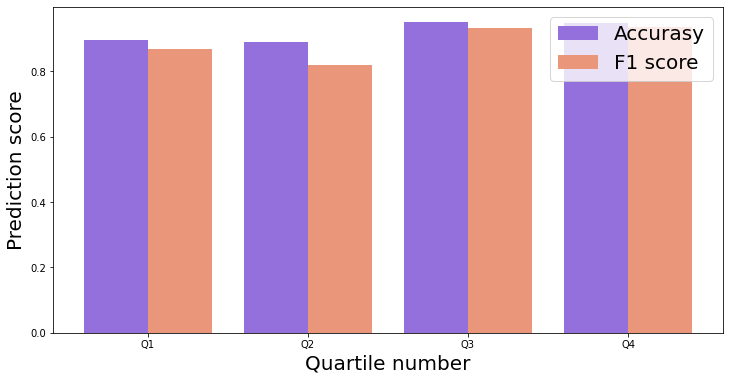

In [76]:
X_axis = np.arange(len(column_names))

plt.figure(figsize=(12, 6))
plt.bar(X_axis-0.2, acc_scores, width=0.4, color = 'mediumpurple', label='Accurasy')
plt.bar(X_axis+0.2, f1_scores, width=0.4, color = 'darksalmon', label='F1 score')

plt.xticks(X_axis, column_names)
plt.ylabel('Prediction score', size = 20)
plt.xlabel('Quartile number', size = 20)
plt.legend(prop={'size': 20});
plt.show()